In [1]:
import pandas as pd
%matplotlib inline
%pwd

'/Users/sefaozalp/Documents/Work/teaching/cardiff_met/prog_for_data_analysis/notebooks/week3'

## Data Ingestion and Cleaning

In [2]:
df = pd.read_csv("/Users/sefaozalp/Documents/Work/teaching/cardiff_met/prog_for_data_analysis/notebooks/week1/phone_data.csv")
df.head()


,index,date,duration,item,month,network
0,0,15/10/2014 06:58,34.429,data,2014-11,Tesco
1,1,15/10/2014 06:58,13.000,NaN,2014-11,Vodafone
2,2,15/10/2014 14:46,23.000,call,2014-11,Meter
3,3,15/10/2014 14:48,4.000,call,2014-11,Tesco
4,4,15/10/2014 17:27,4.000,call,2014-11,Tescoss


In [3]:
df.isnull().sum()


index       0
date        0
duration    2
item        1
month       0
network     0
dtype: int64

In [4]:
clean_df = df.dropna(how="any")

clean_df.isnull().sum()

index       0
date        0
duration    0
item        0
month       0
network     0
dtype: int64

In [5]:
clean_df['network'].value_counts()

Tesco       301
Three       215
Vodafone    213
Meteor       85
world         7
special       3
Tescoss       1
Tescos        1
Meter         1
Name: network, dtype: int64

In [6]:
clean_df['network'].replace(["Meter" ], "Meteor", inplace=True )
clean_df['network'].replace(["Tescos", "Tescoss" ], "Tesco", inplace=True )
clean_df['network'].value_counts()




/Users/sefaozalp/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Tesco       303
Three       215
Vodafone    213
Meteor       86
world         7
special       3
Name: network, dtype: int64

## groupby

In [7]:
clean_df.describe()

,index,duration
count,827.000000,827.000000
mean,415.967352,118.213241
std,238.934429,444.883102
min,0.000000,1.000000
25%,209.500000,1.000000
50%,416.000000,25.000000
75%,622.500000,55.500000
max,829.000000,10528.000000


In [8]:
clean_df['duration'].mean()

118.21324062877872

What if I want to see the mean duration for each operator?

In [9]:
clean_df.groupby('network')['duration'].mean()

network
Meteor       84.093023
Tesco       129.416997
Three       170.004651
Vodafone     69.276995
special       1.000000
world         1.000000
Name: duration, dtype: float64

Lets check reproduce these means ourselves and see what groupby did.

In [10]:
clean_df[clean_df['network']=="Tesco"]['duration'].mean() # same value as above

129.41699669966997

In [11]:
clean_df[clean_df['network']=="Three"]['duration'].mean() 

170.0046511627907

### We use groupby any time we want to analyse pandas series by some category. 
### In this case our category is 'network'.

# *Golden Rule: If you can rephrase your question as for each, then it is possible suitable to use groupby.*

In [12]:


clean_df.groupby('network').count()

,index,date,duration,item,month
network,,,,,
Meteor,86,86,86,86,86
Tesco,303,303,303,303,303
Three,215,215,215,215,215
Vodafone,213,213,213,213,213
special,3,3,3,3,3
world,7,7,7,7,7


In [13]:
clean_df.groupby('month').count()  

,index,date,duration,item,network
month,,,,,
2014-11,227,227,227,227,227
2014-12,157,157,157,157,157
2015-01,205,205,205,205,205
2015-02,137,137,137,137,137
2015-03,101,101,101,101,101


In [14]:
clean_df.groupby('network').describe()

index                                                               \
          count        mean         std    min     25%    50%     75%    max   
network                                                                        
Meteor     86.0  361.918605  191.325421    2.0  217.25  352.5  497.75  802.0   
Tesco     303.0  459.105611  248.483577    0.0  265.00  466.0  677.50  827.0   
Three     215.0  397.990698  224.763094    7.0  205.00  390.0  580.50  815.0   
Vodafone  213.0  388.985915  246.062645   17.0  171.00  398.0  591.00  826.0   
special     3.0  468.333333  304.296456  121.0  358.50  596.0  642.00  688.0   
world       7.0  563.428571  246.897318  360.0  365.50  371.0  826.50  829.0   

         duration                                                               
            count        mean         std  min     25%     50%    75%      max  
network                                                                         
Meteor       86.0   84.093023  170.450174  1.0   1.000   6.000   75.0   1090.0  
Tesco       303.0  129.416997  627.878928  1.0  34.429  34.429   71.0  10528.0  
Three       215.0  170.004651  368.311638  1.0   1.000   4.000  107.0   2328.0  
Vodafone    213.0   69.276995  233.543021  1.0   1.000   1.000    4.0   1859.0  
special       3.0    1.000000    0.000000  1.0   1.000   1.000    1.0      1.0  
world         7.0    1.000000    0.000000  1.0   1.000   1.000    1.0      1.0

Now for example, you want to know number of items for each network group

In [15]:
clean_df.groupby('network')['item'].value_counts()

network   item
Meteor    call     54
          sms      32
Tesco     data    150
          call    140
          sms      13
Three     call    128
          sms      87
Vodafone  sms     148
          call     65
special   sms       3
world     sms       7
Name: item, dtype: int64

## TASK: find which month max number of calls were made?

In [16]:
clean_df.groupby('month')['item'].value_counts().idxmax("call")

('2014-11', 'call')

Grouping can also be done on multiple attributes. We need a list of multiple attributes.

In [17]:
clean_df.groupby([ clean_df['month'], clean_df['network'] ] ).count()

index  date  duration  item
month   network                              
2014-11 Meteor       22    22        22    22
        Tesco        63    63        63    63
        Three        64    64        64    64
        Vodafone     77    77        77    77
        special       1     1         1     1
2014-12 Meteor       24    24        24    24
        Tesco        58    58        58    58
        Three        43    43        43    43
        Vodafone     28    28        28    28
        world         4     4         4     4
2015-01 Meteor       31    31        31    31
        Tesco        60    60        60    60
        Three        59    59        59    59
        Vodafone     55    55        55    55
2015-02 Meteor        5     5         5     5
        Tesco        67    67        67    67
        Three        33    33        33    33
        Vodafone     30    30        30    30
        special       2     2         2     2
2015-03 Meteor        4     4         4     4
        Tesco        55    55        55    55
        Three        16    16        16    16
        Vodafone     23    23        23    23
        world         3     3         3     3

These compounded group can be set against another series.  Number of items (sms, call etc) for each month and network

In [18]:
clean_df.groupby([clean_df['month'], clean_df['network']])['item'].value_counts()

month    network   item
2014-11  Meteor    call    13
                   sms      9
         Tesco     call    31
                   data    29
                   sms      3
         Three     call    39
                   sms     25
         Vodafone  sms     54
                   call    23
         special   sms      1
2014-12  Meteor    call    12
                   sms     12
         Tesco     data    30
                   call    27
                   sms      1
         Three     call    30
                   sms     13
         Vodafone  sms     18
                   call    10
         world     sms      4
2015-01  Meteor    call    21
                   sms     10
         Tesco     data    31
                   call    26
                   sms      3
         Three     sms     33
                   call    26
         Vodafone  sms     40
                   call    15
2015-02  Meteor    call     4
                   sms      1
         Tesco     call    34
                

## TASK: find out the maximum duration of each network on each month.  ** use max()

In [19]:
clean_df.groupby([clean_df['month'], clean_df['network'] ] )['duration'].max()

month    network 
2014-11  Meteor        483.0
         Tesco        1940.0
         Three        1714.0
         Vodafone     1205.0
         special         1.0
2014-12  Meteor        526.0
         Tesco         844.0
         Three        2120.0
         Vodafone      982.0
         world           1.0
2015-01  Meteor        553.0
         Tesco         566.0
         Three        1247.0
         Vodafone     1859.0
2015-02  Meteor       1090.0
         Tesco         777.0
         Three        1863.0
         Vodafone     1107.0
         special         1.0
2015-03  Meteor        192.0
         Tesco       10528.0
         Three        2328.0
         Vodafone     1325.0
         world           1.0
Name: duration, dtype: float64

Analysis can also be focused on particular value of a series, for example 
# What is the sum of durations, for calls only, for each month and network

In [20]:
clean_df[clean_df['item'] == 'call'].groupby(['month', 'network']).sum()

index  duration
month   network                  
2014-11 Meteor     1391    1521.0
        Tesco      2717    7252.0
        Three      4162   12458.0
        Vodafone   2693    4303.0
2014-12 Meteor     3770    2010.0
        Tesco      8600    3933.0
        Three      9339    6316.0
        Vodafone   3016    1302.0
2015-01 Meteor    10132    2207.0
        Tesco     12551    4792.0
        Three     12841    6445.0
        Vodafone   7590    3626.0
2015-02 Meteor     2485    1188.0
        Tesco     22333    5085.0
        Three     14539    6279.0
        Vodafone   4638    1864.0
2015-03 Meteor     3116     274.0
        Tesco     16996   12974.0
        Three      8524    4966.0
        Vodafone   7726    3513.0

## TASK: plot this result in bar plot or plot of your choice

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11581a860>],
      dtype=object)

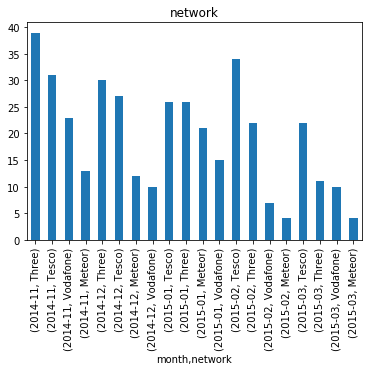

In [21]:
clean_df[clean_df['item'] == 'call'].groupby('month')['network'].value_counts().plot(kind="bar", subplots=True )

## TASK: Which network has the highest number of sms over the 5 months period.

In [22]:
clean_df[clean_df.item=="sms"].groupby(['month'])['network'].value_counts()

month    network 
2014-11  Vodafone    54
         Three       25
         Meteor       9
         Tesco        3
         special      1
2014-12  Vodafone    18
         Three       13
         Meteor      12
         world        4
         Tesco        1
2015-01  Vodafone    40
         Three       33
         Meteor      10
         Tesco        3
2015-02  Vodafone    23
         Three       11
         Tesco        2
         special      2
         Meteor       1
2015-03  Vodafone    13
         Three        5
         Tesco        4
         world        3
Name: network, dtype: int64

In [23]:
clean_df[clean_df.item=="sms"].groupby(['month'])['network'].value_counts().idxmax() ## python finds the max value for you!

('2014-11', 'Vodafone')

## TASK: Get the different items for each month 

In [24]:
clean_df.groupby('month')['item'].value_counts()

month    item
2014-11  call    106
         sms      92
         data     29
2014-12  call     79
         sms      48
         data     30
2015-01  call     88
         sms      86
         data     31
2015-02  call     67
         sms      39
         data     31
2015-03  call     47
         data     29
         sms      25
Name: item, dtype: int64

## TASK: What is the sum of durations, for calls only, for each network

In [25]:
clean_df[clean_df['item'] == 'call'].groupby('network')['duration'].sum()

network
Meteor       7200.0
Tesco       34036.0
Three       36464.0
Vodafone    14608.0
Name: duration, dtype: float64

## Creating a new column 

In [26]:
import numpy as np 
clean_df["long_call"] = np.where(clean_df['duration']>=50, 'yes', 'no')


/Users/sefaozalp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## TASK: create a new column called hour and calculate how many hours each item was.

In [27]:
 np.where(clean_df['duration']/60<1, 0, clean_df['duration']/60)

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  10.03333333,  17.5       ,
         0.        ,  19.71666667,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.53333333,   0.        ,   6.25      ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        13.05      ,   0.        ,   0.        ,   1.68333333,
        28.56666667,   1.6       ,   0.        ,   6.4       ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.43333333,   0.        ,
         0.        ,   7.13333333,   0.        ,   1.15      ,
         0.        ,   0.        ,   0.        ,   0.        ,
         2.18333333,   0.        ,   0.        ,   0.        ,
         9.16666667,   0.        ,   0.        ,   0.        ,
        32.33333333,   4.68333333,   0.        ,   0.        ,
         0.        ,   0.        ,   4.38333333,   0.  

In [28]:
clean_df['hour'] = clean_df['duration']/60

/Users/sefaozalp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Crosstab

Crosstab is another pandas function to transpose and summarise datasets.  For example if you want to for each network how many items per month

In [29]:
pd.crosstab(clean_df['network'], clean_df['month'], margins=True)

month,2014-11,2014-12,2015-01,2015-02,2015-03,All
network,,,,,,
Meteor,22,24,31,5,4,86
Tesco,63,58,60,67,55,303
Three,64,43,59,33,16,215
Vodafone,77,28,55,30,23,213
special,1,0,0,2,0,3
world,0,4,0,0,3,7
All,227,157,205,137,101,827
